In [1]:
sc

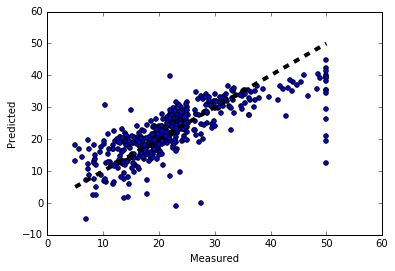

In [2]:
%matplotlib inline

from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [3]:
import os
import sys

try:
 from pyspark import SparkContext
 from pyspark import SparkConf

 print ("Successfully imported Spark Modules")

except ImportError as e:
    print ("Can not import Spark Modules", e)
    sys.exit(1)

words = sc.parallelize(["scala","java","hadoop","spark","akka"])
print words.count()

Successfully imported Spark Modules
5



An interactive shell.

This file is designed to be launched as a PYTHONSTARTUP script.

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion 

[]

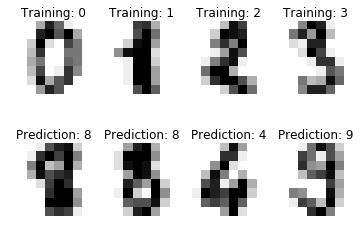

In [4]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.plot()

In [ ]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

f = lambda x: np.exp(3 * x)
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");


lrp = lm.LinearRegression()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y);
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Linear regression");

ridge = lm.RidgeCV()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y);
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_ridge, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.5);
    plt.ylim(-5, 80);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in ridge.coef_]))

plt.plot(x, y, 'ok', ms=10);
plt.title("Ridge regression");